!pip install open3d matplotlib
!pip install trimesh
!pip install pyrender
%env SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True
%pip install mesh-to-sdf
!pip install scikit-image


In [1]:
pose_file="/home/koerner/Project/nice-slam/Datasets/gt_own/room0/traj.txt"

#/home/koerner/Project/nice-slam/output/Own/room0/mesh/00990_mesh_color.ply
#/home/koerner/Project/nice-slam/Datasets/Replica/room0_mesh.ply
#/home/koerner/Project_Dogu/nice-slam/DataSetEval/room0_mesh.obj
#/home/koerner/Project_Dogu/nice-slam/DataSetEval/final_mesh_eval_rec.obj

import trimesh
import pyrender
import skimage
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import math
import sys
import cv2

# Added Psnr

In [2]:
'''try:
    mesh = trimesh.load(ply_file)
except Exception as e:
    print(f"Error loading mesh: {e}")
'''
os.environ['PYOPENGL_PLATFORM'] = 'egl'

def PSNR(color1, color2):
    mse = np.mean((color1 - color2) ** 2)
    psnrScore=20 * np.log10(255.0 / np.sqrt(mse))
    #print("Psnr score",psnrScore)
    return psnrScore

# UPDATE Trajectories

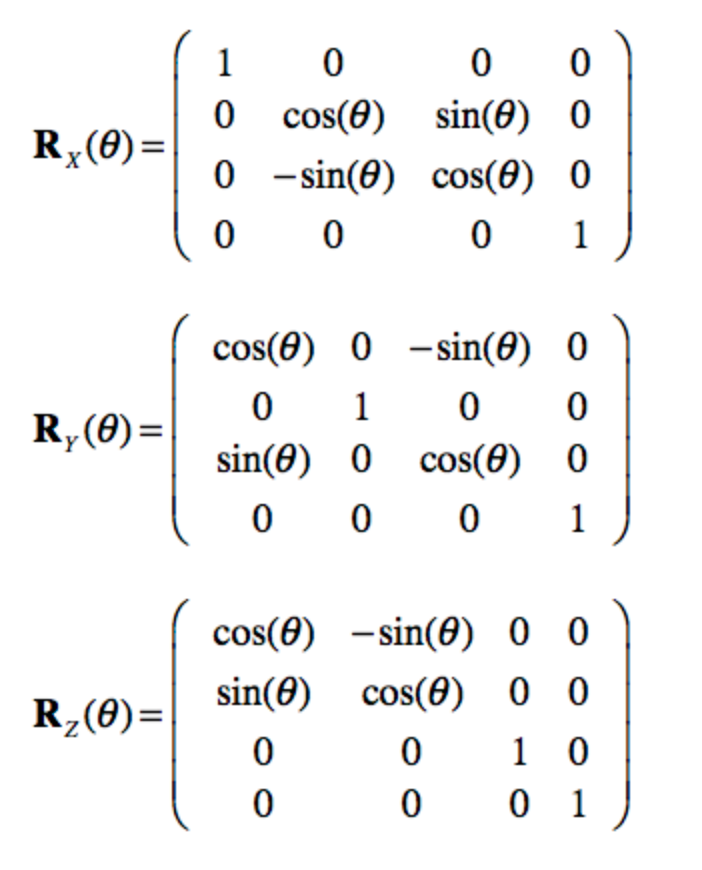

In [3]:
from IPython.display import Image
Image(filename='Rotation.png',width=200, height=500) 

In [4]:

rotation_matrix_x_4x4= np.array([[1, 0, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, -1, 0, 0],
                                 [0, 0, 0, 1]])

rotation_matrix_y= np.array([[0, 0, -1],
                            [0, 1, 0],
                            [1, 0, 0]])

rotation_matrix_z= np.array([[0, -1, 0, 0],
                             [1, 0, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1]])

rotation_matrix_x_3x3= np.array([[1, 0, 0],
                                 [0, 0, 1],
                                 [0, -1, 0]])

rotation_matrix_y_3x3= np.array([[0, 0, -1],
                                 [0, 1, 0],
                                 [1, 0, 0]])

rotation_matrix_z_3x3= np.array([[0, -1, 0],
                             [1, 0, 0],
                             [0, 0, 1]])
def customRot_z_3x3(angle):
    return np.array([[math.cos(2*np.pi*(angle)/360), -math.sin(2*np.pi*(angle)/360),0],
                     [math.sin(2*np.pi*(angle)/360),math.cos(2*np.pi*(angle)/360) ,0 ],
                     [0, 0, 1]])


In [5]:
'''def Thc_to_Twc(T_hc):  # habitat-caemra to habitat world transformation --->  opencv-camera to world transformation
    T_wh, T_hw = habitat_world_transformations()
    T_wc = T_wh @ T_hc @ opencv_to_opengl_camera()
    return T_wc'''
def opencv_to_opengl_camera(T_wc):
    return rotation_matrix_x_4x4@rotation_matrix_x_4x4@T_wc

T_wc = np.loadtxt(pose_file).reshape(-1, 4, 4)
T_wc = opencv_to_opengl_camera(T_wc)
#T_wc[:,1:3] *= -1
trajectories = [T_wc[i] for i in range(T_wc.shape[0])]
print("Trajectories",trajectories[0])

Trajectories [[-3.20569622e-01  4.48055195e-01 -8.34554767e-01  3.45298742e+00]
 [-9.47224956e-01 -1.51635452e-01  2.82438617e-01 -4.54611013e-01]
 [-1.07897793e-16  8.81052344e-01  4.73018782e-01 -5.93628545e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]



#### From bounds [-2.9,8.9],[-3.2,5.5],[-3.5,3.3] room0.yaml
 (8.9-2.9) /2=11.8 x coordinate for middle of the room <br>
 (5.5-3.2) /2=1.15 y coordinate for middle of the room <br>
 (3.3-3.5) /2=-0.15 z coordinate for middle of the room <br>
  the camera looks at the middle of the room downwards thorough z axis <br>
 y axis to the left side of the camera rotation 90 degrees to the window<br>
<br>
np.array([<br>
    [1, 0, 0, 3],<br>
    [0, 1, 0, 1.15],<br>
    [0, 0, 1, 0],<br>
    [0, 0, 0, 1],<br>
])<br>
<br>
ROTATION AXIS z After the transformations looks downwards:<br>
Do 360 with the z axis it should be fine


#### From bounds [-7.0,2.8],[-4.6,4.3],[-3.0,2.9] room1.yaml

In [6]:

ourMeshRoom0 = trimesh.load('/home/koerner/Project_Dogu/nice-slam/DataSetEval/final_mesh_eval_rec.obj')
gtMeshRoom0 = trimesh.load('/home/koerner/Project/nice-slam/Datasets/Replica/room0_mesh.ply')

ourMeshRoom0.invert()
ourMeshRoom0 = pyrender.Mesh.from_trimesh(ourMeshRoom0)
gtMeshPyRoom0 = pyrender.Mesh.from_trimesh(gtMeshRoom0)


ourMeshRoom1 = trimesh.load('/home/koerner/Project_Dogu/nice-slam/data_generation/comparisonMeshes/room1OurSeg.ply')
gtMeshRoom1 = trimesh.load('/home/koerner/Project_Dogu/nice-slam/data_generation/comparisonMeshes/room1_mesh.ply')

ourMeshRoom1.invert()
ourMeshRoom1 = pyrender.Mesh.from_trimesh(ourMeshRoom1)
gtMeshPyRoom1 = pyrender.Mesh.from_trimesh(gtMeshRoom1)



middleRoom0 = np.array([
    [1, 0, 0, 3],
    [0, 1, 0, 1.15],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])
[-7.0,2.8],[-4.6,4.3],[-3.0,2.9]
middleRoom1 = np.array([
    [1, 0, 0, -2.36],
    [0, 1, 0, -0.3],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

In [7]:

#middle[0:3,0:3]=rotation_matrix_y_3x3
# z axis rotation
def psnr360(room):
    if room==0:
        ourMesh=ourMeshRoom0
        gtMeshPy=gtMeshPyRoom0
        middle=middleRoom0
    if room==1:
        ourMesh=ourMeshRoom1
        gtMeshPy=gtMeshPyRoom1
        middle=middleRoom1
    psnr=np.zeros(360)
    for i in range(359,0,-1):
        ourScene = pyrender.Scene(ambient_light= [0.8,0.8,0.8, 1.0])
        gtScene = pyrender.Scene(ambient_light= [0.8,0.8,0.8, 1.0])
        
        ourScene.add(ourMesh)
        gtScene.add(gtMeshPy)
        
        camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.4)
        s = np.sqrt(2)/2

        middle[0:3,0:3] = customRot_z_3x3(i)@rotation_matrix_y_3x3.T@rotation_matrix_z_3x3
        camera_pose = middle
        
        ourScene.add(camera, pose=camera_pose)
        gtScene.add(camera, pose=camera_pose)
        

        r = pyrender.OffscreenRenderer(1200, 680, point_size=1.0)
        
        colorOur, depthOur = r.render(ourScene)
        colorGt, depthGt = r.render(gtScene)
        psnr[i]=PSNR(colorOur,colorGt)
        '''
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(colorOur)
        axarr[0].axis('off')  # Remove axes for first subplot

        axarr[1].imshow(colorGt)
        axarr[1].axis('off')  # Remove axes for first subplot
        plt.show()'''
        
        r.delete()  # Release resources
        gtScene =None
        ourScene = None
    psnr=np.mean(psnr)
    return psnr
#for i in range(2):
print("Room: ",1," Psnr: ",psnr360(1))

Room:  1  Psnr:  27.679668482106464




# Load the mesh using trimesh
ply_file = ply_file  # Replace with your .ply file path
mesh = trimesh.load(ply_file)
vertices = np.asarray(mesh.vertices)
faces = np.asarray(mesh.faces)

# Load your 4x4 matrices representing the trajectory
pose_file =pose_file  # Replace with your pose file path

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh (simple wireframe)
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, linewidth=0.2, antialiased=True)

for idx, mat in enumerate(trajectories):
    # Extract camera position from the matrix
    camera_position = mat[:3, 3]
    ax.axis('off')
    # Set the camera position
    ax.view_init(azim=camera_position[0], elev=camera_position[1])

    # Save the image
    plt.savefig(f'image_{idx}.png')

plt.close()
